# Redo the optimization but using Simulated Annealing

**Import necessary libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

**Define Shannon Entropy, Simulated Annealing, Probability generator functions**

In [6]:
# Define functions
def shannon_entropy(probabilities):
    # Remove any zero probabilities to avoid log(0) issues
    probabilities = probabilities[probabilities != 0]
    return -np.sum(probabilities * np.log(probabilities))

def simulated_annealing_max_entropy(initial_probabilities, num_iterations, initial_temperature=1.0, cooling_rate=0.95):
    current_probabilities = initial_probabilities
    current_entropy = shannon_entropy(current_probabilities)
    entropy_history = [current_entropy]

    for _ in range(num_iterations):
        temperature = initial_temperature * (cooling_rate ** _)

        # Generate a new set of probabilities
        new_probabilities = generate_probability_list(len(current_probabilities))

        # Evaluate the entropy of the new set of probabilities
        new_entropy = shannon_entropy(new_probabilities)

        # Accept the new set of probabilities if its entropy is greater
        if new_entropy > current_entropy or np.random.rand() < np.exp((new_entropy - current_entropy) / temperature):
            current_probabilities = new_probabilities
            current_entropy = new_entropy

        entropy_history.append(current_entropy)

    return entropy_history

def generate_probability_list(size):
    # Generate a list of random numbers
    random_numbers = np.random.rand(size)

    # Normalize the list to make it a probability distribution
    probabilities = random_numbers / np.sum(random_numbers)

    return probabilities

**Generate maximum entropies using Simulated Annealing**

In [13]:
# Example settings
entropy_histories = []
num_iterations = 10000
size_of_list = 1000

for i in range(10):
    initial_guess = generate_probability_list(size_of_list)
    entropy_history = simulated_annealing_max_entropy(initial_guess, num_iterations)
    entropy_histories.append(entropy_history)

In [14]:
# Generate the entropy for a uniform probability distribution, which should be the real maximum entropy
uniform_probabilities = np.full(size_of_list, 1/size_of_list)
uniform_entropy = shannon_entropy(uniform_probabilities)
iteration_list = list(range(len(entropy_history)))

# Generate averaged list of entropy_histories
entropy_histories = np.array(entropy_histories)
entropy_history_averages = np.mean(entropy_histories, axis=0)

**Plot the maximum entropies against iterations to explore convergence**

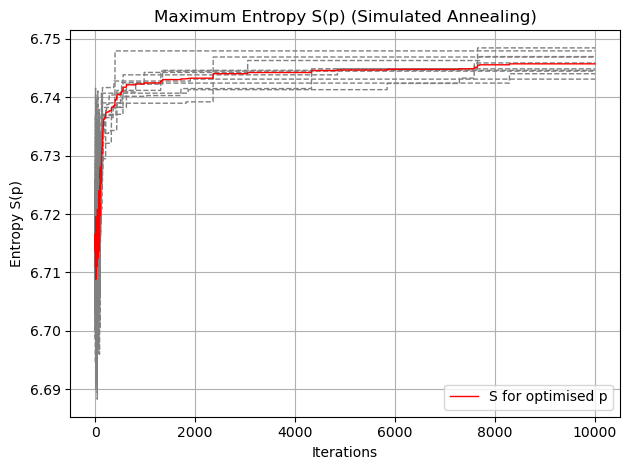

In [17]:
# Plot the entropy evolution against the number of Simulated Annealing iterations
for i in range(0, len(entropy_histories)):
    plt.plot(entropy_histories[i], color='grey', linestyle='--', linewidth=1)
#plt.plot(iteration_list, [uniform_entropy]*len(entropy_history), label = 'S for uniform p')
plt.plot(entropy_history_averages, color='red', linestyle='-', linewidth=1, label = 'S for optimised p')
plt.title('Maximum Entropy S(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Entropy S(p)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()